# Word Frequency in Novels

Analysing the word frequency in documents and books off Project Gutenberg.
Ever heard about the Ziph's Law, a theory stating that the frequency of any word is inversely proportional to its rank in a frequency table? Well, there is a pretty famous [Vsauce video](https://www.youtube.com/watch?v=fCn8zs912OE) on it.

GitHub Repository: https://github.com/skhiearth/Word-Frequency

<img src="http://robslink.com/SAS/democd82/word_frequency.png" 
alt="Word Frequency" width="300" height="200" border="5" /></a>

#### The goal is to plot the most frequent words in any text document or book published on the website of Project Gutenberg, a library of over 60,000 free eBooks. The pipeline implemented can be easily extended to any free document or book published on the internet.

### The steps we would be following are:
1. Using the **requests** package in Python to get the raw data of the document.
2. Parsing the data using the **BeautifulSoup** package.
3. Using regex in **NLTK** to tokenize and removing stopwords in the document, keeping only relevant words.
4. Plotting the word frequencies using **nltk.FreqDist** method.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import string
import re
import nltk
import time

In [2]:
# Defining the stopwords, stemmer and Word Lemmatizer
stopword = nltk.corpus.stopwords.words('english') # Defining Stopwords
ps = nltk.PorterStemmer() # Defining the Porter Stemmer
wn = nltk.WordNetLemmatizer() # Defining the Word Net Lemmatizer

In [3]:
def clean_text(text):
    '''Function to clean the raw text.'''
    
    text_nopunct = "".join([char.lower() for char in text if char not in string.punctuation])
    token = re.split("\W+", text_nopunct)
    text_nostopword = [word for word in token if word not in stopword]
    # clean_text = [ps.stem(word) for word in text_nostopword] 
    # We use lemmatizing because of it's higher sophistication and we don't have a performance bottleneck
    clean_text = [wn.lemmatize(word) for word in text_nostopword]
    return clean_text

In [4]:
def word_frequency(path_to_document):
    '''Function to fetch any document off Project Gutenberg and plot a Frequency Distribution Graph of the words.'''
    
    start = time.time()
    
    # Using the requests package in Python to get the raw data of the document
    r_out = requests.get(path_to_document)
    text = r_out.text
    
    # Create a BeautifulSoup object from the HTML
    bf_out = BeautifulSoup(text, "html5lib")
    
    # Obtaining the text from the BeautifulSoup object
    doc_text = bf_out.get_text()
    
    # Calling the clean_text function to clean the text
    words = clean_text(doc_text)
    
    # Creating the frequency distribution and plotting it.
    freqdist1 = nltk.FreqDist(words)
    freqdist1.plot(30)
    
    end = time.time()
    total = end - start
    print("Word frequency plotting completed in: %.2f seconds." % (total))

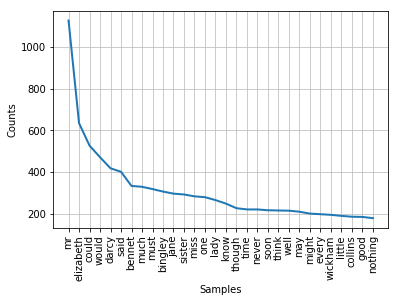

Word frequency plotting completed in: 16.28 seconds.


In [5]:
# Pride and Prejudice, by Jane Austen
word_frequency("https://www.gutenberg.org/files/1342/1342-h/1342-h.htm")

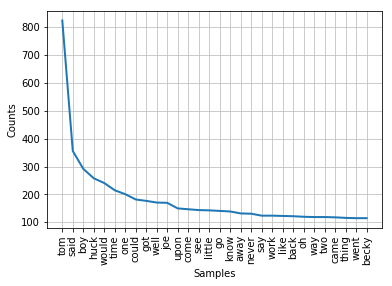

Word frequency plotting completed in: 9.02 seconds.


In [6]:
# The Adventures of Tom Sawyer, Complete by Mark Twain (Samuel Clemens)
word_frequency("https://www.gutenberg.org/files/74/74-h/74-h.htm")

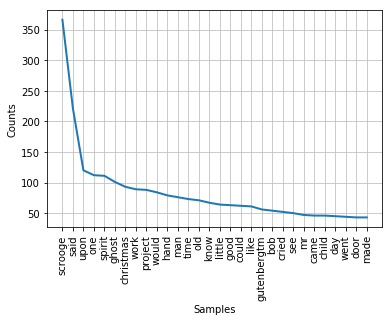

Word frequency plotting completed in: 4.17 seconds.


In [7]:
# A Christmas Carol, by Charles Dickens
word_frequency("https://www.gutenberg.org/files/46/46-h/46-h.htm")

#### All these plots are more-or-less in accordance with the Ziph's law.